In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile, loadmat
from scipy.signal import find_peaks
%matplotlib widget


In [99]:
def find_B(T,L,plot=True):
    """ 
    Prend en entrée :
    - T : Tension de la corde
    - L : longeur de corde
    et changer C1P1mat le nom du fichier qu'on load en première ligne

    Rend B le coef d'inharmonicité
    """
    C1P1mat = loadmat("../../../Mesures/Mesures_2023.01.27_LAM_normalise/Medium_1/Corde_Acier/C_3_P_1.mat") #a changer
    acc = C1P1mat["acc_t"].reshape(-1)
    fs2 = int(C1P1mat["fs"].reshape(-1))
    acc_F = np.fft.rfft(acc)
    freq = np.fft.rfftfreq(len(acc)) * fs2

    idx,height = find_peaks(20*np.log10(np.abs(acc_F)),height = 65, distance=400)
    if plot :
        plt.figure()
        plt.plot(freq,20*np.log10(np.abs(acc_F)))
        for i in idx:   
            plt.axvline(freq[i],ls='--',color='r')
        plt.xlim(20,4000)
        plt.show()
    

    j = 1
    idx_fin = 1
    for i in idx : 
        if int((freq[i]+5)/freq[idx[0]]) != int(j):
            break
        j +=1
        print("freq : ",freq[i],", rapport : ",freq[i]/freq[idx[0]])
        idx_fin = j
    print(idx_fin)

    freq_pic = freq[idx[:idx_fin-1]]


    freq_pic_normalisé = np.zeros_like(freq_pic)
    n_2 = np.zeros_like(freq_pic)
    for i in range(1,len(freq_pic)):
        freq_pic_normalisé[i] = freq_pic[i] / (i+1)
        n_2[i] = (i+1)**2
    freq_pic_normalisé[0] = freq_pic[0]

    fit = np.polyfit(n_2,freq_pic_normalisé,deg=1)
    droite = fit[0] * freq + fit[1] 
    if plot:
        plt.figure()
        plt.plot(n_2,freq_pic_normalisé,'+')
        plt.plot(freq,droite)
        plt.xlim(n_2[0],n_2[-1] + 10)
        plt.ylim(freq_pic_normalisé[0]-1,freq_pic_normalisé[-1] + 1)
        plt.grid()
        plt.show()

    

    B = 2 * T * L**2 * fit[0] / (fit[1] * np.pi**2)
    return(B)

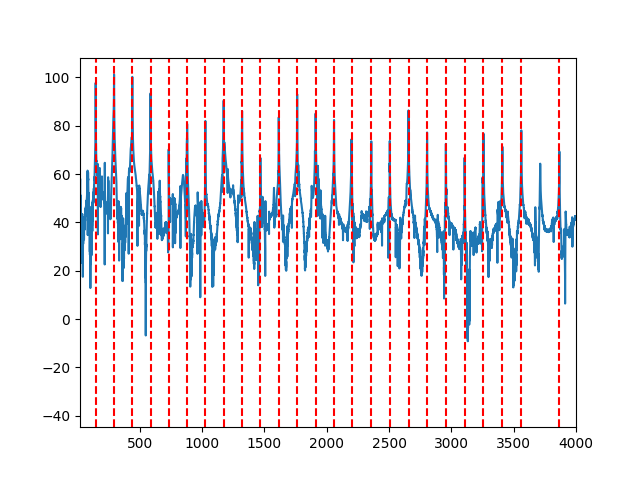

freq :  145.79999999999998 , rapport :  1.0
freq :  293.40000000000003 , rapport :  2.012345679012346
freq :  439.79999999999995 , rapport :  3.016460905349794
freq :  586.0 , rapport :  4.01920438957476
freq :  731.8000000000001 , rapport :  5.019204389574761
freq :  879.5999999999999 , rapport :  6.032921810699588
freq :  1026.0 , rapport :  7.037037037037038
freq :  1172.8 , rapport :  8.043895747599452
freq :  1320.6 , rapport :  9.05761316872428
freq :  1467.3999999999999 , rapport :  10.064471879286694
freq :  1614.8 , rapport :  11.075445816186559
freq :  1762.6000000000001 , rapport :  12.089163237311388
freq :  1910.6000000000001 , rapport :  13.104252400548699
freq :  2058.4 , rapport :  14.117969821673528
freq :  2198.6 , rapport :  15.079561042524007
freq :  2357.4 , rapport :  16.168724279835395
freq :  2505.6 , rapport :  17.185185185185187
freq :  2656.0 , rapport :  18.216735253772292
freq :  2805.0 , rapport :  19.23868312757202
freq :  2955.8 , rapport :  20.272976680

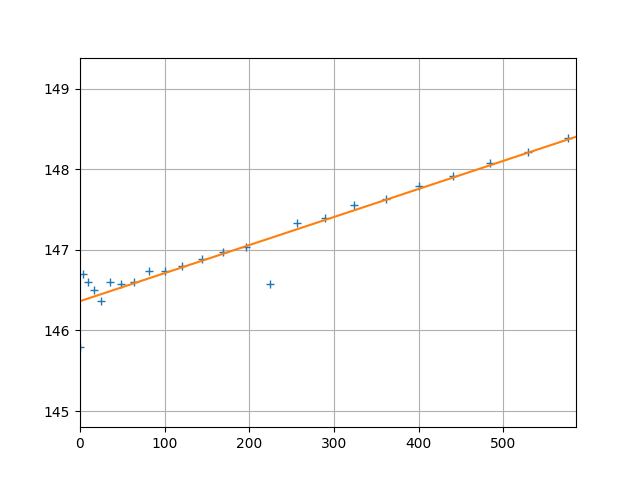

In [100]:
B = find_B(T=93.947707,L=0.65)

In [101]:
B

0.0001911980597183336

Tout avec Plectre_1

B_acier_2 (corde de la) : 0.0002581 calculé sur Medium_1

B_acier_2 (corde de la) : 0.0002523518258125349 calculé sur Medium_2

B_acier_2 : 0.0001748923062999701 calculé sur Metal

B_acier_2 : 0.0002593356225074 calculé sur Plexi

B_acier_3 (corde de ré) : 0.00021918277874610596 sur plexi
B_acier_3 : 0.000201715746830928 sur acier
B_acier_3 : 0.0001943572734201584 sur medium_2
B_acier_3 : 0.0001911980597183336 sur medium_1

http://www.atiam.ircam.fr/Archives/Stages0910/Barascud.pdf p15

# Brouillon : 
## 1 : on load les fichiers

In [9]:
from scipy.io import wavfile, loadmat
C1P1mat = loadmat("../../../Mesures/Mesures_2023.01.27_LAM_normalise/Medium_1/Corde_Acier/C_2_P_1.mat")
acc = C1P1mat["acc_t"].reshape(-1)
fs2 = int(C1P1mat["fs"].reshape(-1))

In [10]:
acc_F = np.fft.rfft(acc)
freq = np.fft.rfftfreq(len(acc)) * fs2

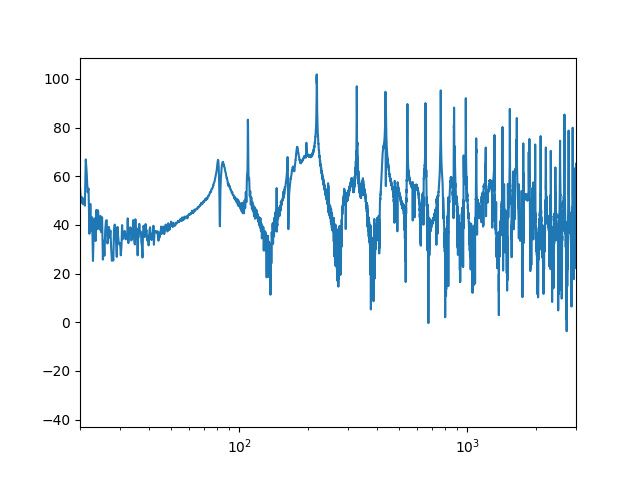

In [11]:
plt.figure()
plt.semilogx(freq,20*np.log10(np.abs(acc_F)))
plt.xlim(20,3000)
plt.show()

## 2 : On choppe les pics

In [12]:
from scipy.signal import find_peaks

In [13]:
idx,height = find_peaks(20*np.log10(np.abs(acc_F)),height = 70, distance=400)

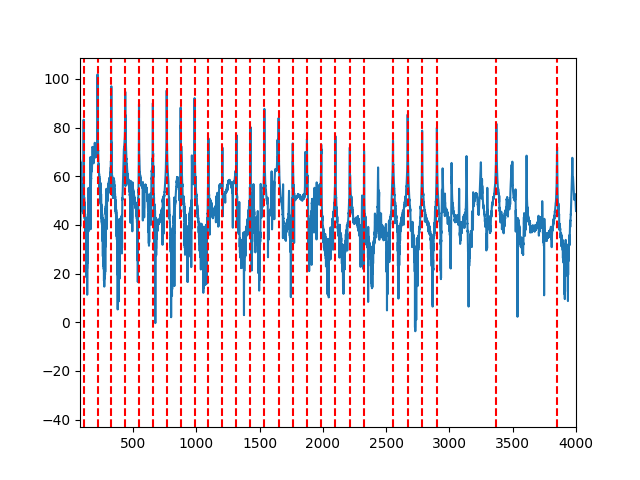

In [14]:
plt.figure()
plt.plot(freq,20*np.log10(np.abs(acc_F)))
for i in idx:   
    plt.axvline(freq[i],ls='--',color='r')
plt.xlim(80,4000)
plt.show()

In [15]:
## on prends que les harmoniques qui se suivent (à la fin on en loupe mais c'est pas grave)

j = 1
idx_fin = 1
for i in idx : 
    if int(freq[i]/freq[idx[0]]) != int(j):
        break
    j +=1
    print(freq[i]/freq[idx[0]])
    idx_fin = j

1.0
2.005504587155963
3.005504587155963
4.014678899082568
5.012844036697248
6.0165137614678885
7.0201834862385315
8.031192660550458
9.040366972477063
10.044036697247705
11.058715596330275
12.078899082568807
13.093577981651375
14.10275229357798
15.135779816513761
16.159633027522933
17.188990825688073
18.22385321100917
19.253211009174308
20.297247706422016
21.330275229357795


In [16]:
freq_pic = freq[idx[:idx_fin-1]]

In [17]:
freq_pic

array([ 109. ,  218.6,  327.6,  437.6,  546.4,  655.8,  765.2,  875.4,
        985.4, 1094.8, 1205.4, 1316.6, 1427.2, 1537.2, 1649.8, 1761.4,
       1873.6, 1986.4, 2098.6, 2212.4, 2325. ])

## 3 : on crée les données comme dans le mémoire de stage

In [18]:

freq_pic_normalisé = np.zeros_like(freq_pic)
n_2 = np.zeros_like(freq_pic)
for i in range(1,len(freq_pic)):
    freq_pic_normalisé[i] = freq_pic[i] / (i+1)
    n_2[i] = (i+1)**2
freq_pic_normalisé[0] = freq_pic[0]

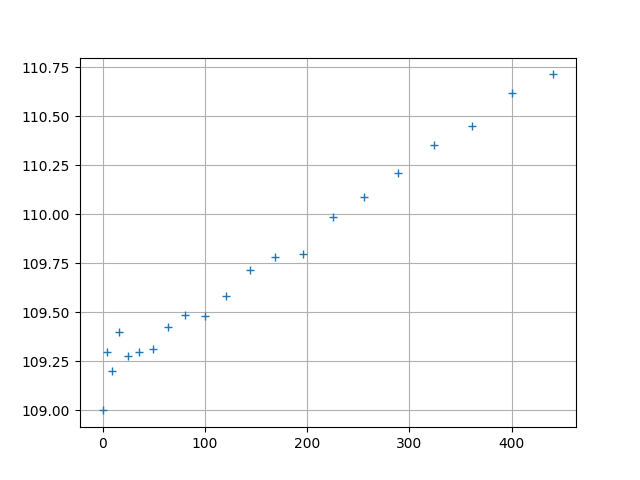

In [19]:
plt.figure()
plt.plot(n_2,freq_pic_normalisé,'+')
plt.grid()
plt.show()

In [30]:
## On fit cette courbe

fit = np.polyfit(n_2,freq_pic_normalisé,deg=1)
fit

array([3.52923679e-03, 1.09181805e+02])

In [31]:
droite = fit[0] * freq + fit[1] 

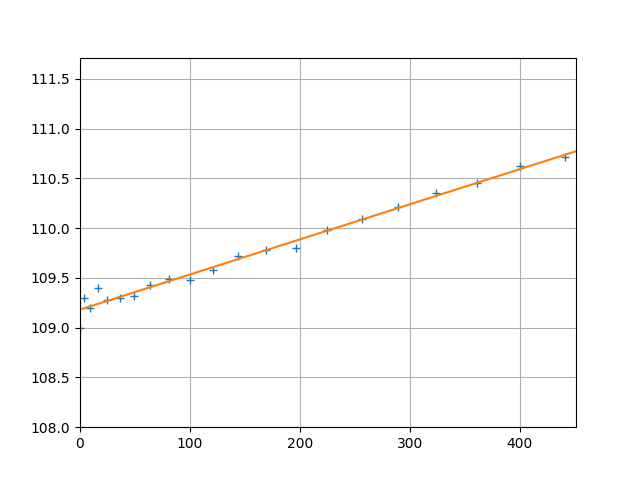

In [34]:
plt.figure()
plt.plot(n_2,freq_pic_normalisé,'+')
plt.plot(freq,droite)
plt.xlim(n_2[0],n_2[-1] + 10)
plt.ylim(freq_pic_normalisé[0]-1,freq_pic_normalisé[-1] + 1)
plt.grid()
plt.show()

In [35]:
## On calcul B

T = 79.34
L = 0.65

B = 2 * T * L**2 * fit[0] / (fit[1] * np.pi**2)

In [36]:
B

0.00021957338027910164